In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline

대한민국 대표 기업공시채널 KIND 사이트(http://kind.krx.co.kr) 에서 회사명과 종목코드를 읽어온다.

In [2]:
# 판다스의 read_html() 메소드는 인수로 지정된 url의 데이터를 크롤링한다.
# !pip install lxml     # 크롤링 라이브러리
# !pip install openpyxl # 액셀 파일로 데이터프레임을 저장할 대 사용하는 라이브러리
import lxml
import openpyxl

# 크롤링한 결과에서 [0]을 인덱싱하지 않으면 리스트로 읽어오기 때문에 [0]을 반드시 인덱싱하고
# header = 0 옵션을 지정해서 첫 줄을 데이터프레임의 열 이름으로 설정한다.
# code_df = \
# pd.read_html("http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13", \
#              header = 0) # 리스트
code_df = \
pd.read_html("http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13", \
             header = 0)[0] # 데이터프레임

print(type(code_df))
code_df.head()

<class 'pandas.core.frame.DataFrame'>


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
1,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
2,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,LG이노텍,11070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,정철동,http://www.lginnotek.co.kr,서울특별시


In [3]:
# 판다스의 to_excel() 메소드로 데이터프레임을 액셀 파일로 저장할 수 있다.
code_df.to_excel("./data/stock.xlsx")

In [4]:
# 판다스의 read_excel() 메소드로 액셀 파일을 데이터프레임으로 읽어올 수 있다.
code_df = pd.read_excel("./data/stock.xlsx")
code_df.head()

,Unnamed: 0,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,0,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
1,1,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
2,2,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,4,LG이노텍,11070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,정철동,http://www.lginnotek.co.kr,서울특별시


In [5]:
# 종목코드가 6자리이기 때문에 최상위 유효숫자 앞에 0을 추가해서 6자리로 맞춘다.
# 데이터프레임의 특정 열에 접근하려면 데이터프레임["열이름"] 형식으로 사용할 수 있고 
# 데이터프레임.열이름 형식으로도 사용할 수 있다. => 데이터프레임.열이름 형식을 사용할 때는 열이름을
# 따옴표로 묶지 않는다.
# 판다스의 map() 메소드를 사용해서 숫자 데이터 왼쪽의 남는 자리에 0을 채울 수 있다.
code_df.종목코드 = code_df.종목코드.map("{0:06d}".format)
code_df.head()

,Unnamed: 0,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,0,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
1,1,GS,078930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
2,2,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,4,LG이노텍,011070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,정철동,http://www.lginnotek.co.kr,서울특별시


In [6]:
# 크롤링한 상장법인 목록에서 필요한 열은 회사명과 종목코드이므로 필요한 열만 남긴다.
code_df = code_df[["회사명", "종목코드"]]
code_df.head()

,회사명,종목코드
0,DSR,155660
1,GS,078930
2,GS글로벌,001250
3,HDC현대산업개발,294870
4,LG이노텍,011070


In [7]:
# 한글로된 열 이름을 영어로 변경한다.
# 판다스의 rename() 메소드로 열 이름을 변경할 수 있다. 변경할 열 이름은 colunms 속성에 딕셔너리
# 형태로 전달하면 된다.
code_df = code_df.rename(columns = {"회사명": "name", "종목코드": "code"})
code_df.head()

,name,code
0,DSR,155660
1,GS,078930
2,GS글로벌,001250
3,HDC현대산업개발,294870
4,LG이노텍,011070


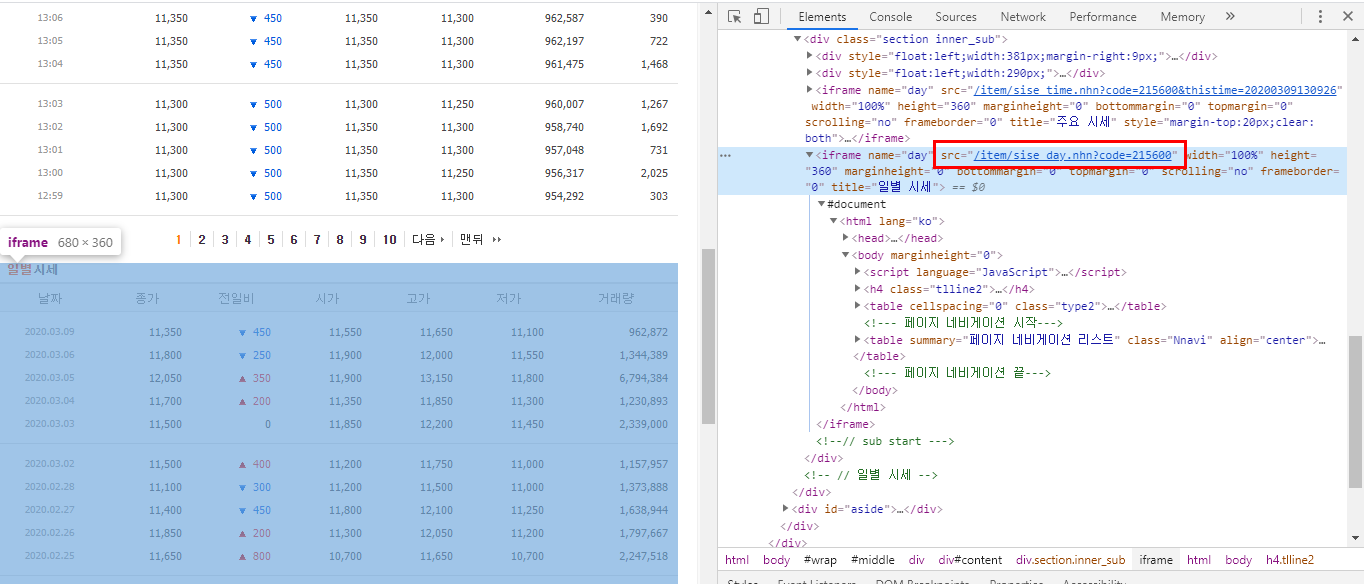

In [32]:
# 종목 이름을 넘겨받아 종목에 해당되는 상장법인 목록의 코드를 불러와 네이버 금융
# (https://finance.naver.com/)에 넣어준다.
def get_url(item_name, code_df):
    # to_string() 메소드로 시리즈를 문자열로 변경한다. 이 때 인덱스는 필요없고 종목코드만 있으면
    # 되기 때문에 index = False 옵션을 지정해서 인덱스를 없앤다.
    code = code_df[code_df["name"] == item_name]["code"].to_string(index = False).strip()
    # print(code)
    url = "https://finance.naver.com/item/sise_day.nhn?code={}".format(code)
    print("요청 url : {}".format(url))
    return url

Image("./numpyImage/stock.png", width = 1100, height = 1000)

In [65]:
# 상장법인 목록에서 특정 법인의 날짜별 주가 데이터의 url을 얻어온다.
item_name = "삼성전자"
url = get_url(item_name, code_df)

요청 url : https://finance.naver.com/item/sise_day.nhn?code=005930


In [66]:
# 날짜별 주가 데이터를 저장할 빈 데이터프레임을 선언한다.
df = pd.DataFrame()

import time # sleep() 메소드를 사용하기 위해 모듈을 import 시켜준다.
# 1페이지 부터 20페이지 사이의 데이터를 얻어온다.
for page in range(1, 26):
    page_url = "{}&page={}".format(url, page)
    # print(page_url)
    # 대형 포털 사이트는 아주 짧은 간격의 정보 요청이 지속적으로 들어오면 자기네 사이트가 공격을
    # 당하는 것으로 판단할 수 있기 때문에 약간의 시간 간격을 지정해 주는 것이 좋다.
    # time.sleep(0.3) # sleep() 메소드의 인수로 지정된 시간만큼 프로그램을 멈춘다.
    df = df.append(pd.read_html(page_url, header = 0)[0], ignore_index = True)

# 결측치가 있는 행을 제거한다.
df = df.dropna()
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2020.07.20,54200.0,200.0,54800.0,54800.0,54000.0,10416737.0
2,2020.07.17,54400.0,600.0,54200.0,54700.0,54100.0,10096174.0
3,2020.07.16,53800.0,900.0,54800.0,54800.0,53800.0,16779127.0
4,2020.07.15,54700.0,900.0,54400.0,55000.0,54300.0,24051450.0
5,2020.07.14,53800.0,400.0,53700.0,53800.0,53200.0,14269484.0
...,...,...,...,...,...,...,...
369,2019.07.23,47300.0,100.0,47350.0,47550.0,47050.0,9061381.0
370,2019.07.22,47200.0,400.0,46800.0,47300.0,46600.0,9009109.0
371,2019.07.19,46800.0,700.0,46650.0,46950.0,46600.0,8819393.0
372,2019.07.18,46100.0,50.0,46450.0,46450.0,45650.0,5143554.0


In [67]:
# 한글로 된 열 이름을 영어로 바꾼다.
df = df.rename(columns = {"날짜": "date", "종가": "close", "전일비": "diff", "시가": "open",\
                         "고가": "high", "저가": "low", "거래량": "volume"})
# date 열의 데이터 타입을 datetime 타입으로 변경한다.
df["date"] = pd.to_datetime(df["date"])
# date 열을 제외한 나머지 열의 데이터 타입을 int 타입으로 변경한다.
df[["close", "diff", "open", "high", "low", "volume"]] = \
    df[["close", "diff", "open", "high", "low", "volume"]].astype(int)
# 날짜를 기준으로 오름차순 정렬한다.
df = df.sort_values(by = "date", ascending = True)
df

,date,close,diff,open,high,low,volume
373,2019-07-17,46050,800,46150,46350,45950,5216602
372,2019-07-18,46100,50,46450,46450,45650,5143554
371,2019-07-19,46800,700,46650,46950,46600,8819393
370,2019-07-22,47200,400,46800,47300,46600,9009109
369,2019-07-23,47300,100,47350,47550,47050,9061381
...,...,...,...,...,...,...,...
5,2020-07-14,53800,400,53700,53800,53200,14269484
4,2020-07-15,54700,900,54400,55000,54300,24051450
3,2020-07-16,53800,900,54800,54800,53800,16779127
2,2020-07-17,54400,600,54200,54700,54100,10096174


In [68]:
# !pip install plotly
# 그래프 작성에 필요한 모듈을 설치하고 import 한다.
import plotly.offline as offline
import plotly.graph_objs as go

In [69]:
# jupyter notebook에 출력하기 위해 초기화 한다.
offline.init_notebook_mode(connected = True)
# plotly 그래프에 표시할 데이터를 넣어준다.
trace = go.Scatter(x = df.date, y = df.close, name = item_name)
data = [trace]
# plotly 그래프의 레이아웃을 설정한다.
layout = dict(
    title = "{}의 종가(close) Time Series".format(item_name),
    xaxis = dict(
        rangeselector = dict (
            buttons = list([
                dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
                dict(count = 3, label = "3m", step = "month", stepmode = "backward"),
                dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
                dict(step = "all")
            ])
        ), rangeslider = dict(), type = "date"
    )
)
# plotly 그래프를 만든다.
fig = go.Figure(data = data, layout = layout)
# plotly 그래프를 화면에 표시한다.
offline.iplot(fig)